<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.1/blob/main/POS_A3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Me
##Analysis of Survey Data for POS
##Exploratory Analysis
##Using R

## History
A2-v1 : Using "Without POS Survey" as input (from earlier working in Python)

A2-v2 : Going back to the original file (SurveyData20201003 - A2) to have everything in R

A2-v3 : Completing the Data Cleaning up. Checking unique values of various variables to see if there are any issues to be fixed there

A2-v4 : Data Cleanup completed. CSV written for subsequent analysis 'Without_POS_CleanData.csv'

A3-v1 : Getting into Exploratory Analysis based on CSV created in A2-v4

A3-v2 : WIP


In [1]:
# library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# reading in input File
df_master = read_csv('/content/Without_POS_CleanData.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  EMP_CODE = col_double()
)

See spec(...) for full column specifications.



In [3]:
# printing DF
print(as_tibble(df_master))

# A tibble: 317 x 20
   EMP_CODE ORG_NAME ORG_CITY EMP_PER_OUTLET ORG_TYPE EXPANSION RECONCILIATION
      <dbl> <chr>    <chr>    <chr>          <chr>    <chr>     <chr>         
 1    33409 Al syed… Islamab… Less than 5    Single … Yes       Yes           
 2    36750 Sohaib … Islamab… Less than 5    Single … Yes       Yes           
 3    34729 Inam co… Rawalpi… Less than 5    Single … No        No            
 4    33409 Reco tr… Islamab… Less than 5    Multipl… Yes       Yes           
 5    33409 Archee … Islamab… Less than 5    Single … Yes       Yes           
 6    36750 Zaki Ge… Rawalpi… Less than 5    Single … Yes       Yes           
 7    35918 Xyz      Karachi  Less than 5    Single … Yes       Yes           
 8    36750 Haseeb … Islamab… Less than 5    Single … Yes       Yes           
 9    36731 Eithsha… islamab… Less than 5    Single … Yes       Yes           
10    36585 adeel s… Rawalpi… Less than 5    Single … Yes       No            
# … with 307 more rows, and 13 

In [4]:
## inspect the data
str(df_master)

tibble [317 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ EMP_CODE             : num [1:317] 33409 36750 34729 33409 33409 ...
 $ ORG_NAME             : chr [1:317] "Al syed medical store" "Sohaib Computer" "Inam cosmetic" "Reco tradors" ...
 $ ORG_CITY             : chr [1:317] "Islamabad" "Islamabad" "Rawalpindi" "Islamabad" ...
 $ EMP_PER_OUTLET       : chr [1:317] "Less than 5" "Less than 5" "Less than 5" "Less than 5" ...
 $ ORG_TYPE             : chr [1:317] "Single Outlet" "Single Outlet" "Single Outlet" "Multiple outlets" ...
 $ EXPANSION            : chr [1:317] "Yes" "Yes" "No" "Yes" ...
 $ RECONCILIATION       : chr [1:317] "Yes" "Yes" "No" "Yes" ...
 $ WHY_NO_POS           : chr [1:317] "I am happy with how my business is managed presently" "Don’t want to spend money, I am happy with how my business is managed presently, Tax purposes" "I am happy with how my business is managed presently" "Tax purposes" ...
 $ LANGUAGE_PREF        : chr [1:317] "Both, English & Urdu" "Bo

In [5]:
df_1 = df_master

df_1 hereon

In [6]:
df_1 %>% glimpse()

Rows: 317
Columns: 20
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 33409, 36750, 35918…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Yearly )",…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "No", "Yes", "No", "Yes", "No…
$ INTERNET_PROVIDER     <chr> 

In [7]:
colnames(df_1)

[1] "EMP_CODE"              "ORG_NAME"              "ORG_CITY"             
 [4] "EMP_PER_OUTLET"        "ORG_TYPE"              "EXPANSION"            
 [7] "RECONCILIATION"        "WHY_NO_POS"            "LANGUAGE_PREF"        
[10] "PAYMENT_PREF"          "PAYMENT_AMOUNT"        "INTERNET_ACCESS"      
[13] "INTERNET_PROVIDER"     "INTERNET_DISRUPTION"   "DEPLOYMENT_PREF"      
[16] "BUSINESS_IMPROVEMENT"  "STORE_CUST_DATA"       "OFFER_DISCOUNTS"      
[19] "COMPETITIVE_ADVANTAGE" "ORG_CITY_CLEAN"

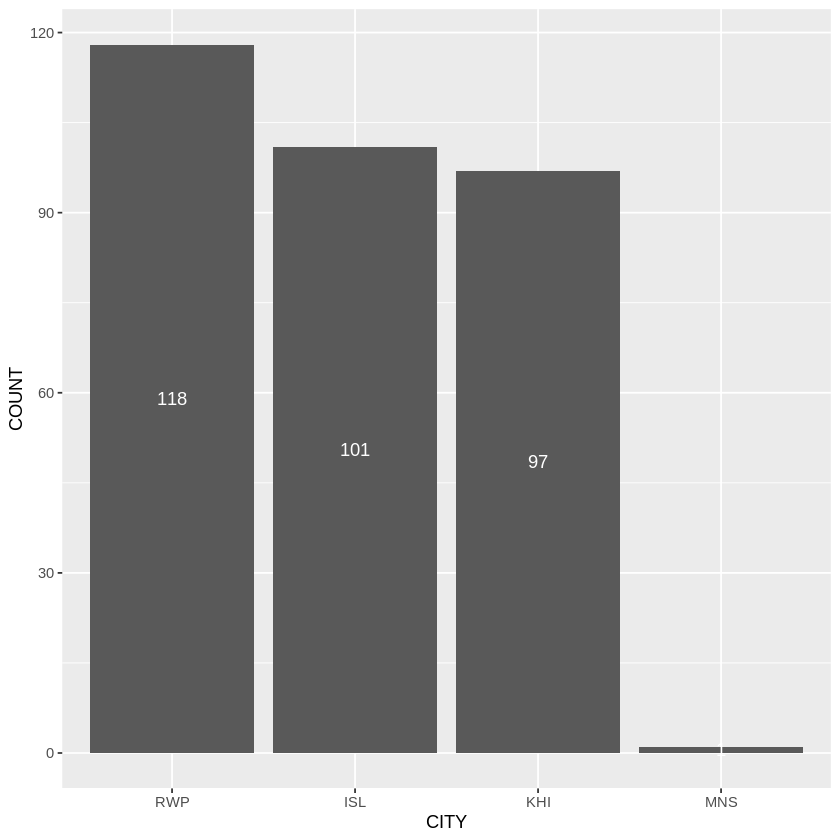

In [22]:
# https://stackoverflow.com/questions/5208679/order-bars-in-ggplot2-bar-graph

positions <- c("RWP","ISL", "KHI", "MNS")
g <- ggplot(df_1, aes(x = ORG_CITY_CLEAN)) + scale_x_discrete(limits = positions)


# Number of cases in each city:
g <- g + geom_bar()
p.labs <- g + labs(x = "CITY", y = "COUNT")
p.labs <- p.labs + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')

#p.labs <- p.labs + geom_text(aes(label='stat(prop)*100', group=1), stat='count')

p.labs

In [13]:
distinct(df_1, EMP_PER_OUTLET)

EMP_PER_OUTLET
<chr>
Less than 5
More than 5 but less than 10
More than 10


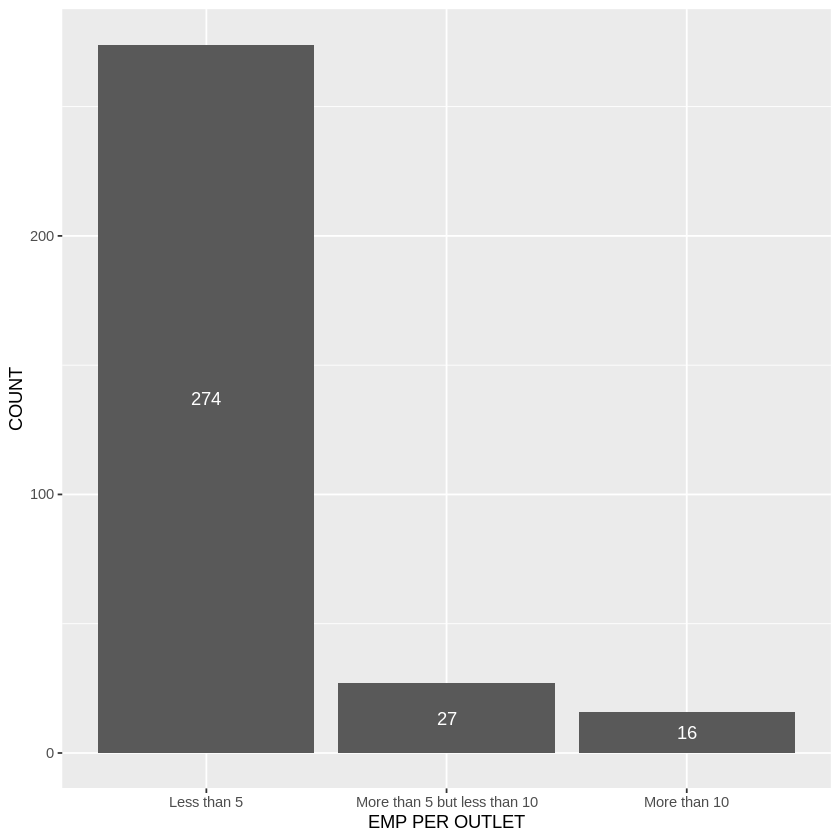

In [25]:

positions <- c("Less than 5"
,"More than 5 but less than 10"
,"More than 10")
g <- ggplot(df_1, aes(x = EMP_PER_OUTLET)) + scale_x_discrete(limits = positions)


# Number in each city:
g <- g + geom_bar()
#g
p.labs <- g + labs(x = "EMP PER OUTLET", y = "COUNT")
p.labs <- p.labs + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs



In [44]:
# recode EMP_PER_OUTLET

df_2 = df_1 %>%
  mutate(ORG_SIZE = recode(EMP_PER_OUTLET, "Less than 5" = "<5",
  "More than 5 but less than 10" = "5To10",
  "More than 10" = "10+"))

df_2 hereon

In [45]:
distinct(df_2, ORG_TYPE)

ORG_TYPE
<chr>
Single Outlet
Multiple outlets
Chain


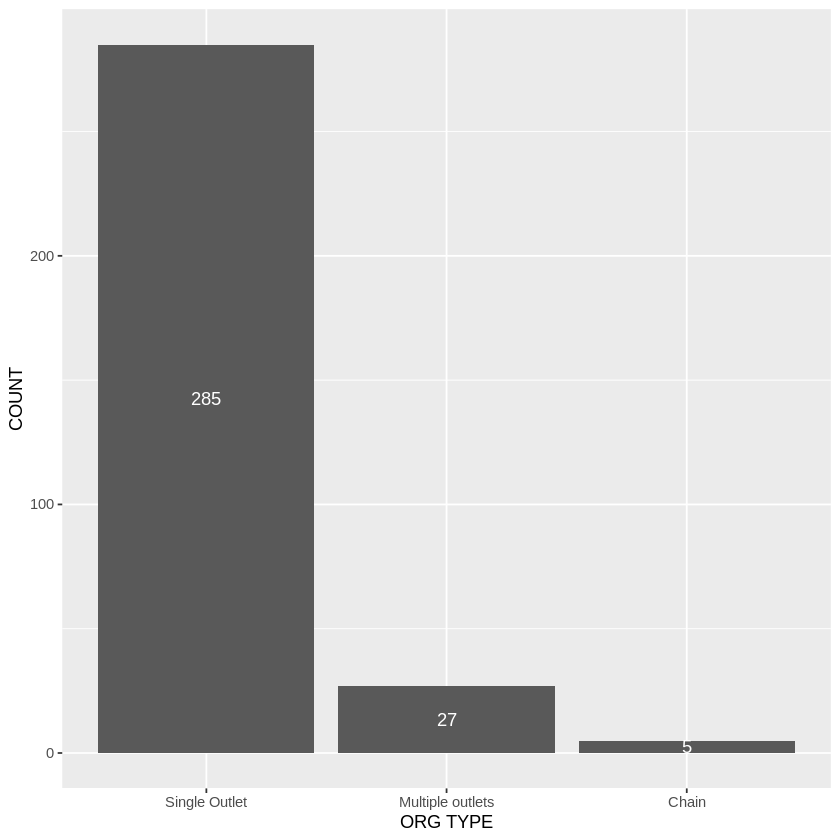

In [30]:
positions <- c("Single Outlet"
,"Multiple outlets"
,"Chain")
g <- ggplot(df_2, aes(x = ORG_TYPE)) + scale_x_discrete(limits = positions)


# Number in each city:
g <- g + geom_bar()
#g
p.labs <- g + labs(x = "ORG TYPE", y = "COUNT")
p.labs <- p.labs + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

In [46]:
nrow(df_2)

[1] 317

In [47]:
glimpse(df_2)

Rows: 317
Columns: 21
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 33409, 36750, 35918…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Yearly )",…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "No", "Yes", "No", "Yes", "No…
$ INTERNET_PROVIDER     <chr> 

In [49]:
# remove single entry with MNS
df_2 <- df_2 %>%
  filter(ORG_CITY_CLEAN != "MNS")

In [50]:
nrow(df_2)

[1] 316

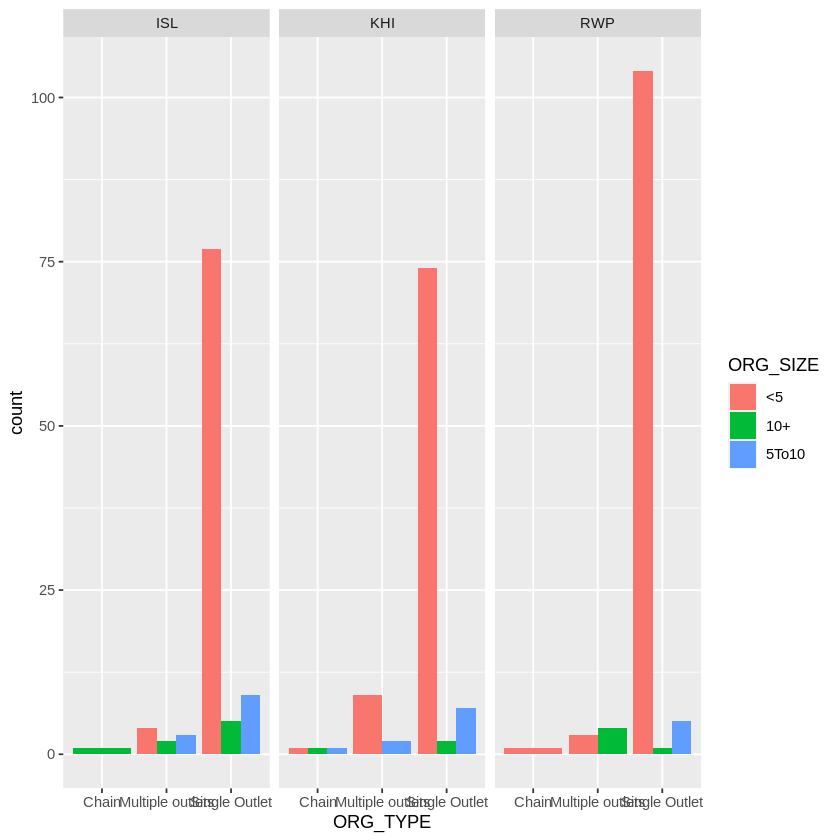

In [51]:
# Stacked Bar Chart

positions <- c("<5"
,"5To10"
,"10+")

df_2 %>%
    ggplot(aes(x = ORG_TYPE)) +
    geom_bar(aes(fill = ORG_SIZE), position = "dodge") +
    facet_wrap(~ ORG_CITY_CLEAN)